# 프로젝트 : 나랑 닮은 연예인을 찾아보자

## 1. 데이터 불러오기

file_list: ['김성주.jpg', '조인성.jpg', '금난새.jpg', '변요한.jpg', '하정우.jpg', '원빈.jpg', '딘딘.jpg', '김광규.jpg', '지석진.jpg', '장도연.jpg', '설운도.jpg', '조커.jpg', '봉준호.jpg', '푸틴.jpg', '이정재.jpg', '이순재.jpg', '송강호.jpg', '조수미.jpg', '나영석.jpg', '이영자.jpg', '양세형.jpg', '신봉선.jpg', '황정민.jpg', '윌스미스.jpg', '기안84.jpg', '박나래.jpg', '강호동.jpg', '장윤주.jpg', '유산슬.jpg', '이세돌.jpg', '차태현.jpg', '이서진.jpg', '이소룡.jpg', '조정석.jpg', '이광수.jpg', '이경규.jpg', 'mypicture2.jpg', '백종원.jpg', '도티.jpg', '송중기.jpg', '유병재.jpg', '한혜진.jpg', '현빈.jpg', '박슬기.jpg', '노홍철.jpg', '페이커.jpg', '조성모.jpg', '문재인.jpg', '남주혁.jpg', '임창정.jpg', '박보검.jpg', '비.jpg', '레오나르도디카프리오.jpg', '김영철.jpg', '최수종.jpg', '김수현.jpg', '조승우.jpg', '오바마.jpg', '이동욱.jpg', '배정남.jpg', '박진영.jpg', '김준현.jpg', '이승기.jpg', '이병헌.jpg', '유세윤.jpg', '정형돈.jpg', '오혁.jpg', '김대중.jpg', '정우성.jpg', '한혜연.jpg', 'mypicture.jpg', '공유.jpg', '신동엽.jpg', '윤상.jpg', '펭수.jpg', '박서준.jpg', '정해인.jpg', '김병만.jpg', '이사배.jpg', '김종국.jpg', '이수근.jpg']


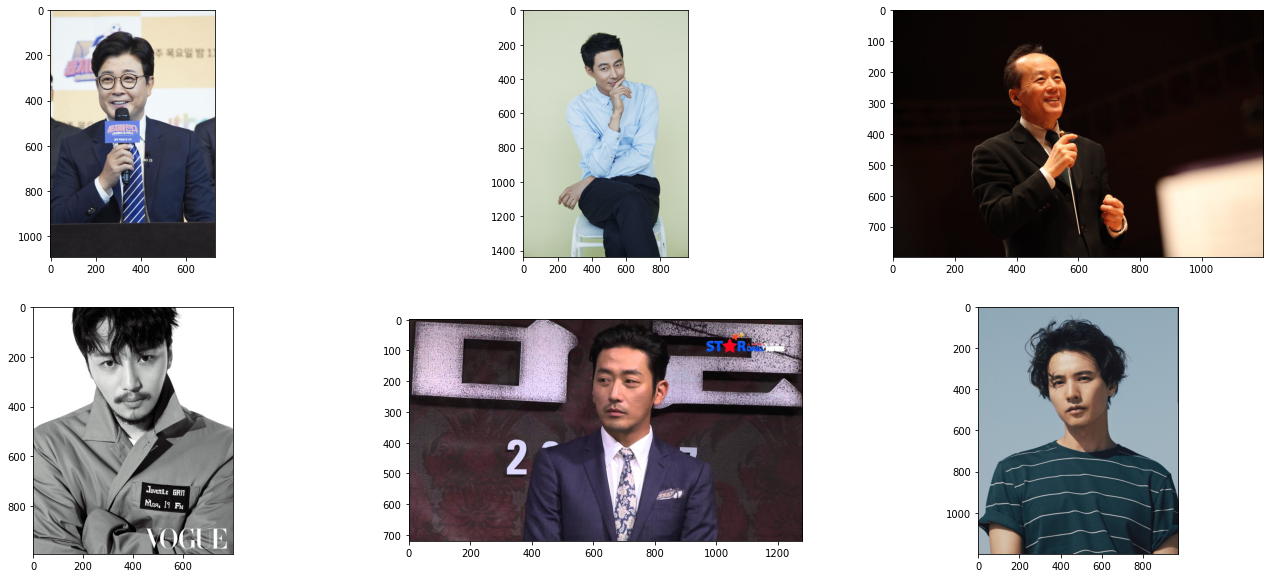

In [2]:
import os
import numpy as np


dir_path = './images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))

import matplotlib.pyplot as plt
import matplotlib.image as img

#Set figsize here
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(24,10))

# flatten axes for easy iterating
for i, ax in enumerate(axes.flatten()):
  image = img.imread(dir_path+'/'+file_list[i])
  ax.imshow(image)
plt.show()

fig.tight_layout()

## 2. 얼굴 영역 추출

In [4]:
import face_recognition
import os
%matplotlib inline
import matplotlib.pyplot as plt

import face_recognition
import os

# 얼굴 영역만 자르는 함수
def get_cropped_face(image_file):
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

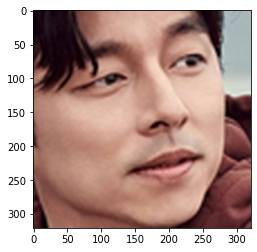

In [3]:
# 얼굴 잘리는지 확인
image_path = './images/공유.jpg'

cropped_face = get_cropped_face(image_path)
plt.imshow(cropped_face)

## 3. 얼굴 영역 임베딩 추출

In [4]:
# 얼굴 영역을 가지고 얼굴 임베딩 벡터를 구하는 함수
def get_face_embedding(face):
    return face_recognition.face_encodings(face)


# 파일 경로를 넣으면 embedding_dict를 리턴하는 함수

def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}
    
    for file in file_list:
        try: 
            img_path = os.path.join(dir_path, file)
            face = get_cropped_face(img_path)
            embedding = get_face_embedding(face)
            if len(embedding) > 0:  
            # 얼굴영역 face가 제대로 detect되지 않으면  len(embedding)==0인 경우가 발생하므로 
            # os.path.splitext(file)[0]에는 이미지파일명에서 확장자를 제거한 이름이 담깁니다. 
                embedding_dict[os.path.splitext(file)[0]] = embedding[0]
                #  embedding_dict[] 이미지 파일의 임베딩을 구해 담음 키=사람이름, 값=임베딩 벡터
                #  os.path.splitext(file)[0] 파일의 확장자를 제거한 이름만 추출
                #  embedding[0]은 넣고 싶은 요소값

        except:
            continue
            
    return embedding_dict

In [5]:
embedding_dict = get_face_embedding_dict(dir_path)

## 4. 연예인들과 비교

In [7]:
# 이미지 간 거리를 구하는 함수

def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

print('내 사진끼리의 거리:', get_distance('mypicture', 'mypicture2'))

내 사진끼리의 거리: 0.40230625778540047


In [8]:
# name1과 name2의 거리를 비교하는 함수를 생성하되, name1은 미리 지정하고, name2는 호출시에 인자로 받도록 합니다.

def get_sort_key_func(name1):
    def get_distance_from_name1(name2):
        return get_distance(name1, name2)
    return get_distance_from_name1

In [9]:
# 닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트 출력하는 함수

def get_nearest_face(name, top=5):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))
    
    rank_cnt = 1 # 순위를 세는 변수
    pass_cnt = 1 # 건너뛴 숫자를 세는 변수(본인 사진 카운트)
    end = 0      # 닮은 꼴 5번 출력시 종료하기 위해 세는 변수
    for i in range(top+15):
        rank_cnt += 1
        if sorted_faces[i][0].find('mypicture') == 0:  # 본인 사진인 mypicture라는 파일명으로 시작하는 경우 제외합니다.
            pass_cnt += 1
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(rank_cnt - pass_cnt, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))
            end += 1
        if end == 5: # end가 5가 된 경우 연예인 5명 출력되었기에 종료합니다.
            break

In [10]:
get_nearest_face('mypicture')

순위 1 : 이름(도티), 거리(0.43915609252033905)
순위 2 : 이름(딘딘), 거리(0.5007643406756024)
순위 3 : 이름(오혁), 거리(0.5095569251287292)
순위 4 : 이름(정형돈), 거리(0.5173725418129305)
순위 5 : 이름(조성모), 거리(0.5191125095312106)


In [11]:
get_nearest_face('mypicture2')

순위 1 : 이름(비), 거리(0.5431855760033399)
순위 2 : 이름(김종국), 거리(0.5466928455499146)
순위 3 : 이름(김성주), 거리(0.5525581125049404)
순위 4 : 이름(도티), 거리(0.5569652489862313)
순위 5 : 이름(장도연), 거리(0.5570346463516691)


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


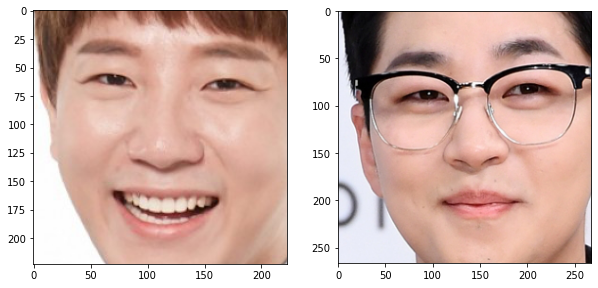

In [10]:
# 결과 시각화
doti_path = './images/도티.jpg'
dindin_path = './images/딘딘.jpg'

plt.figure(figsize=(10,8))
plt.subplot(1, 2, 2)
doti = get_cropped_face(doti_path)
plt.subplot(1, 2, 1)
plt.imshow(doti)
dindin = get_cropped_face(dindin_path)
plt.subplot(1, 2, 2)
plt.imshow(dindin)

# 결과 및 고찰

- 도티가 0.4391로 가장 닮았다고 나왔다.  

- 데이터가 많지 않아 유사한 얼굴을 찾기 어렵다.

- 대체로 0.5이상의 이미지가 나왔는데 이정도면 안닮은거 아닌가